In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Data Exploration and Visualization

In [135]:
# Original dataset
fundamentals = pd.read_csv("fundamentals.csv")

fund_df = fund_df.dropna()
fund_df

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,2700000.0,...,4.313300e+09,1.024000e+09,6.549900e+09,3.108100e+09,9.658000e+09,4.673300e+09,-6.183700e+09,2014.0,4.26,1.690845e+08
1772,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,3000000.0,...,5.862900e+09,1.617900e+09,9.887900e+09,1.733160e+10,2.721950e+10,5.997800e+09,-6.329100e+09,2015.0,0.78,1.884615e+08
1777,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5000000.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.000000e+00,2013.0,1.01,4.990099e+08
1778,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5000000.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.000000e+00,2014.0,1.16,5.025862e+08


In [ ]:
correlation_matrix = fund_df.corr()
correlation_with_ESO = correlation_matrix['Estimated Shares Outstanding'].sort_values(ascending=False)
correlation_with_ESO

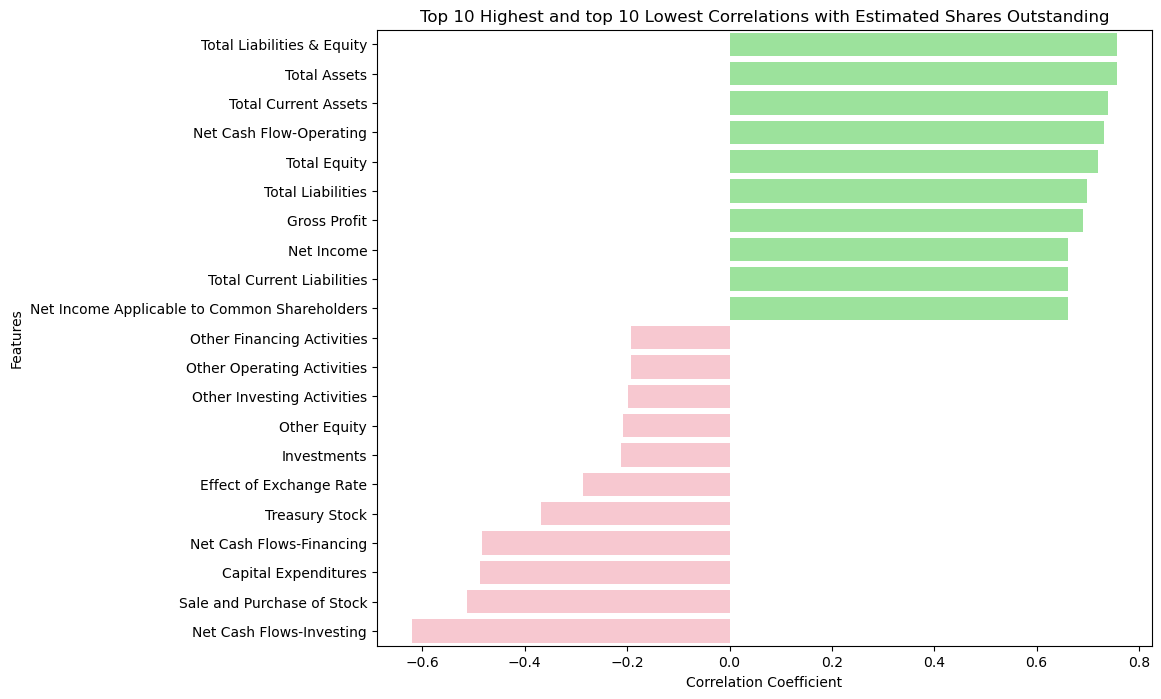

In [93]:
# Filter out the top 10 highest without the the correlation with themselves
top_10_highest = correlation_with_ESO[1:11]
# Filter out the top 10 lowest without the the correlation with themselves
top_10_lowest = correlation_with_ESO[-10:]

top_and_bottom_10 = pd.concat([top_10_highest, top_10_lowest])
colors = ["lightgreen" if x > 0 else "pink" for x in top_and_bottom_10.values]
plt.figure(figsize=(10, 8))
sns.barplot(x=top_and_bottom_10.values, y=top_and_bottom_10.index, palette=colors)
plt.title('Top 10 Highest and top 10 Lowest Correlations with Estimated Shares Outstanding')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Above are the top 10 highest correlation pairs for variables and top 10 lowest (strongest negative correlation) 
pairs of variables. I will plot some of pairs of variables (correlation with estimated shares outstanding) below:

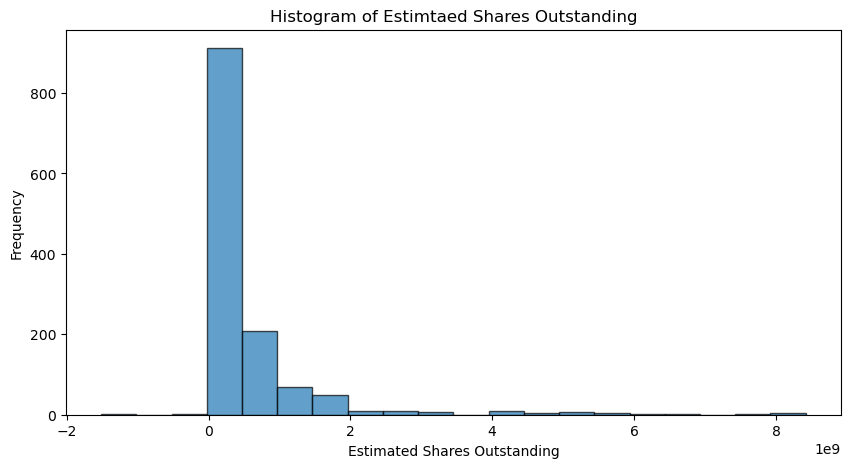

In [61]:
# Hitogram for estimated shares outstanding
plt.figure(figsize=(10, 5))
plt.hist(fund_df['Estimated Shares Outstanding'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Estimtaed Shares Outstanding")
plt.xlabel("Estimated Shares Outstanding")
plt.ylabel("Frequency")
plt.show()

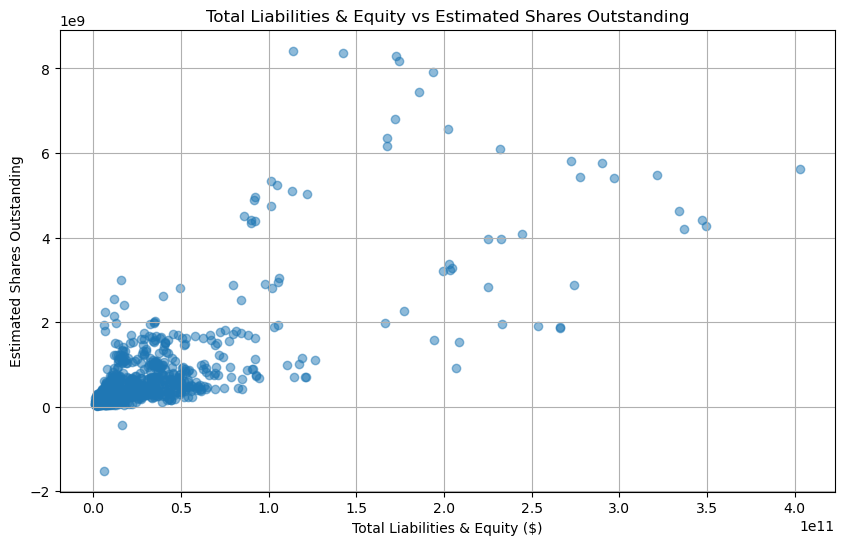

In [95]:
 # Plotting Total liabilities & Equity vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Total Liabilities & Equity'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Total Liabilities & Equity vs Estimated Shares Outstanding')
plt.xlabel('Total Liabilities & Equity ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

The plot shows a wide range of values for both Total Liabilities & Equity and Estimated Shares Outstanding, suggesting 
a diversity in the financial structures of the companies in the dataset. There appears to be a higher concentration of 
data points towards the lower end of both axes, indicating that a significant number of companies have relatively low levels of both Total Liabilities & Equity 
and Estimated Shares Outstanding. Though the above calculation shows strongest relationship between total liabilities & Equity
vs estimated shares outstanding, the plot here doesn't really show a strong linear correlation, 
but this does show that more liabilities & equity leads to more estimated shares outstanding. 

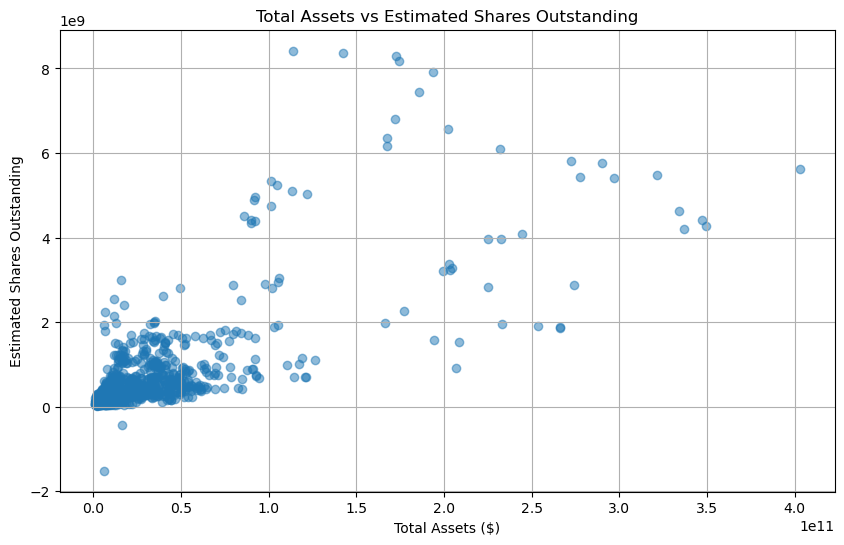

In [100]:
 # Plotting Total Assets vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Total Assets'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Total Assets vs Estimated Shares Outstanding')
plt.xlabel('Total Assets ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

This plot could indicate that as companies grow in size, 
the variation in the number of shares outstanding increases. These does not seem like to be a clear linear 
correlation here between Total Assets and Estimated Shares outsnding. While there's no clear linear pattern, 
there's still seem like a positive correlation here. 

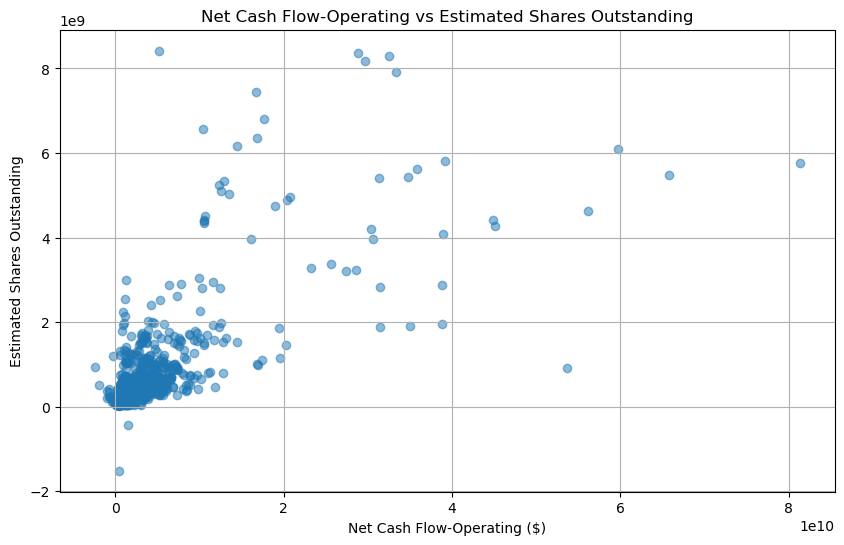

In [102]:
 # Plotting Net Case Flow opearting vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Net Cash Flow-Operating'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Net Cash Flow-Operating vs Estimated Shares Outstanding')
plt.xlabel('Net Cash Flow-Operating ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

As the value of Net Cash Flow from Operating Activities increases, the data points spread out more, indicating greater 
variability in the number of shares outstanding among companies with higher operating cash flows. The relationship 
between Net Cash Flow from Operating Activities and Estimated Shares Outstanding shows as positive. 

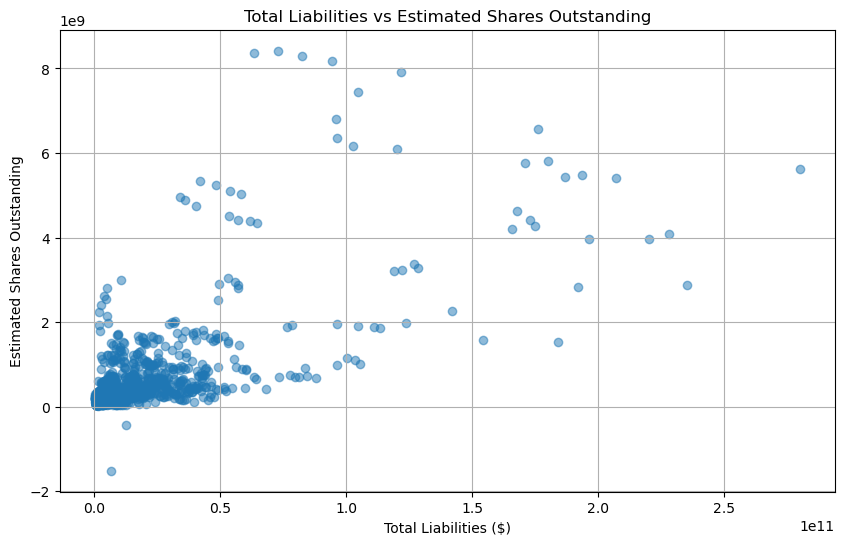

In [103]:
 # Plotting Total Liabilities vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Total Liabilities'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Total Liabilities vs Estimated Shares Outstanding')
plt.xlabel('Total Liabilities ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

The data points appear to spread out, indicating a wider variance in the number of shares outstanding among companies 
with higher liabilities. There are some outliers, those with big y-scale indicating some companies with a 
significantly larger number of shares outstanding. a few outliers on the x-scale suggests that some companies 
have substantially lower total liabilities. These seems like a positive(non-linear) correlation between these 2 variables. 

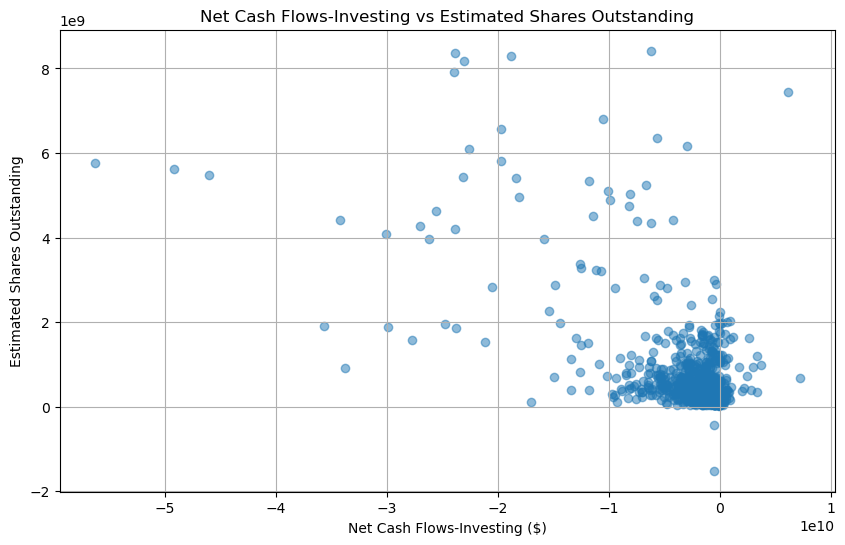

In [104]:
 # Plotting Net Cash Flows-Investing vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Net Cash Flows-Investing'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Net Cash Flows-Investing vs Estimated Shares Outstanding')
plt.xlabel('Net Cash Flows-Investing ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

The spread of data points does not suggest a clear linear correlation between Net Cash Flows-Investing and 
Estimated Shares Outstanding. But relatively large net cash flows-investing does lead to a relatively low estimated shares 
outstanding, which indicates negative correlation. These companies could be funding their investments through retained earnings or debt rather than equity financing.

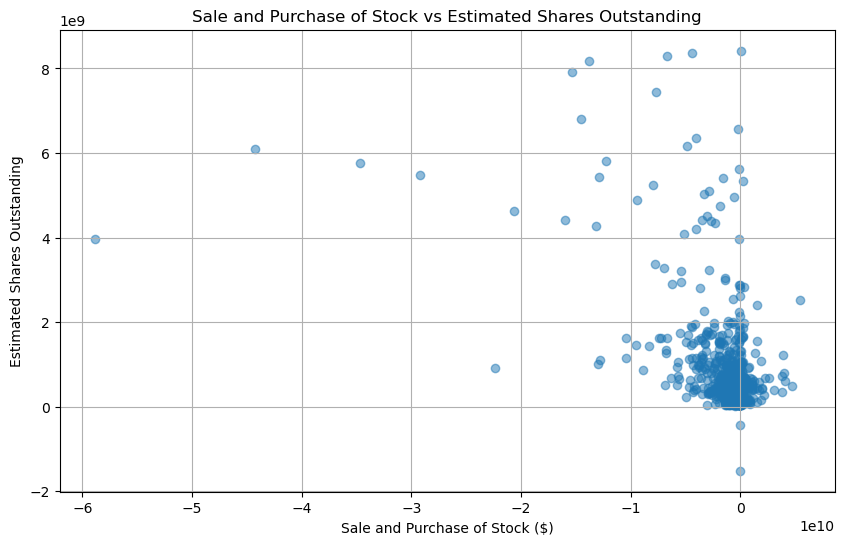

In [106]:
 # Plotting Sales and purchases of Stocks vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Sale and Purchase of Stock'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Sale and Purchase of Stock vs Estimated Shares Outstanding')
plt.xlabel('Sale and Purchase of Stock ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

There are significant negative values on the x-axis, which could indicate more stock being purchased than sold. There isn't a clear linear trend, but it might be effected by other factors.

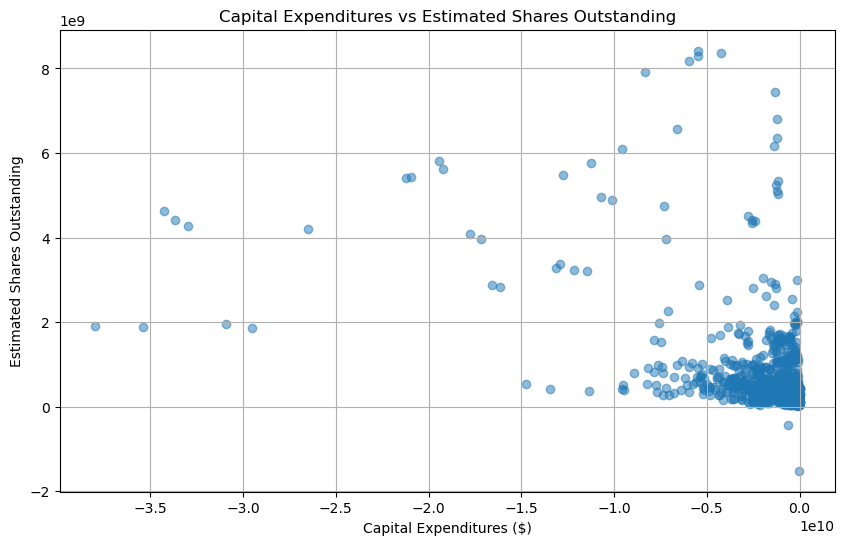

In [107]:
 # Plotting Capital Expenditures vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Capital Expenditures'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Capital Expenditures vs Estimated Shares Outstanding')
plt.xlabel('Capital Expenditures ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

The distribution of points along the y-axis is spreading, especially for companies with smaller capital expenditures 
This might indicate that companies with modest capital spending can have a wide range of shares outstanding. 
The scatter plot does show a negative correlation but does not show a clear linear relationship between the two variables, may be due to number of shares outstanding can be influenced by other factors like buybacks, etc. 

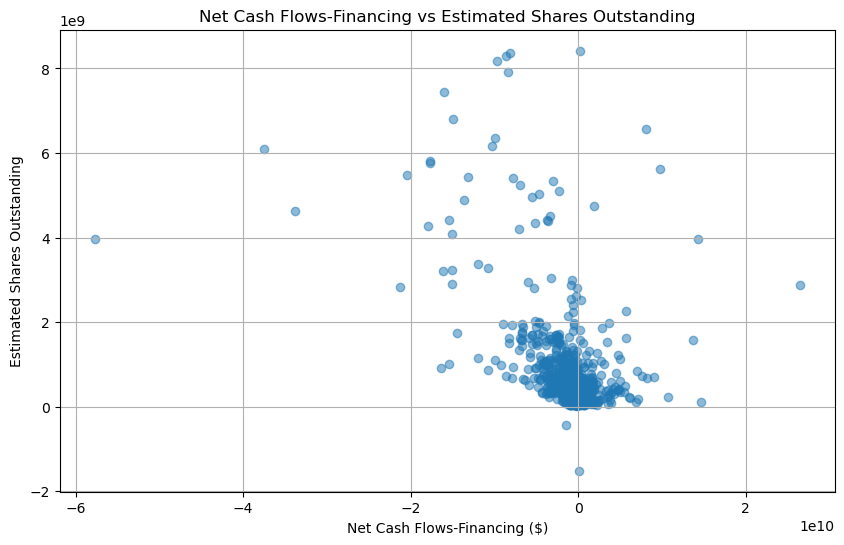

In [108]:
 # Plotting Net Cash Flows-Financing vs Estimated Shares Outstanding
plt.figure(figsize=(10, 6))
plt.scatter(fund_df['Net Cash Flows-Financing'], fund_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title('Net Cash Flows-Financing vs Estimated Shares Outstanding')
plt.xlabel('Net Cash Flows-Financing ($)')
plt.ylabel('Estimated Shares Outstanding')
plt.grid(True)
plt.show()

There is no clear linear correlation, however, there is a cluster around the higher end of net cash flows-financing and lower end of estimated shares outstanding, it does show that relatively larger net cash flows-financing leads to 
relatively lower shares oustanding(negative correlation). 

# 2. Linear Regression Model

In [115]:
import statsmodels.api as sm
X = fund_df.drop('Estimated Shares Outstanding', axis=1)
y = fund_df['Estimated Shares Outstanding']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                                  20:44:29   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Add'l income/expense items                              0.0361      0.057      0.635      0.525      -0.075       0.148
After Tax ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash and Cash Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes in Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost of Revenue                                      3247.0211   4451.899      0.729      0.466   -5487.171     1.2e+04
Current Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred Asset Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred Liability Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings Before Interest and Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings Before Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Effect of Exchange Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity Earnings/Loss Unconsolidated Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed Assets                                           -0.0572      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0642      0.989     -0.065      0.9

The adjusted R-squared value is 0.846, indicating that approximately 84.6% of the variance in the estimated shares outstanding
can be explained by the all the other variables (except first 3 columns) in the dataset, which indicates a good fit. The 
F-statistics of 98.4 suggests the model is statistically significant. Some variables, like cash retio, short-term investments, other financing activities, operating income, net cash flows-financing, income tax, etc are statistically significant at the 0.05 level, suggesting these variables have a significant effect on estimated shares outstanding.

# 3. Multicollinearity in Linear Regression: Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients.

A large condition number suggests that the model's results might be unstable. This means that small changes in the data could lead to large changes in the coefficients, making the model unreliable. When multicollinearity is present, the coefficients of the regression model may be incorrectly estimated, which leads to the difficulties of estimating the effect of any one independent variable on the estimated shares outstanding with certainty. A condition number of 1.17e+16 is extremely high, which indicates a high degree of multicollinearity within this regression model.so the the estimated coefficients may not be reliable for interpreting the effect on the estimated shares outstanding. 
This could also lead to a increase of standard errors, making it difficult to determine which variables are truly important to predict estimated shares outstanding.

# 4. P-Value Analysis and Histogram: Create a histogram of the p-values.

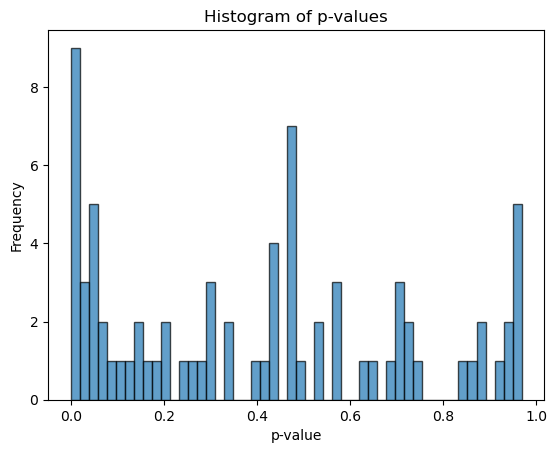

In [117]:
p_values = results.pvalues
# Plot the histogram of the p-values
plt.hist(p_values, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

This Histogram of p-values doesn't show a clear left or right skewness. Usually, if all variables are insignificant, the p-values should follow a uniform distribution between 0 and 1 which above histogram does not follow either. There is a big frequencey on p-value of 1 which indicates highly insignificance. There is also a peak of p-value being 0 which indicates that the model does contains several variables that are significant to predict the model. This irregular and unstable p-values distribution could be due to multicollinearity as discussed above, and this could also be due to the model containing some irrelevant variables making the model overfitting. 

# 5 False Discovery Rate Control with BH Procedure: How many “true” discoveries do you estimate?

In [131]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Calculate the number of true discoveries
  num_true_discoveries = np.sum(sorted_pvals <= alpha)
  print(f"Estimated Number of True Discoveries: {num_true_discoveries}")
    
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha, num_true_discoveries

Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7


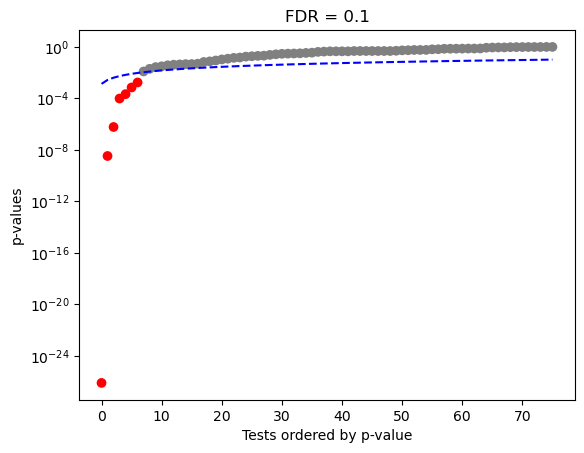

FDR threshold: (0.0016866311007422974, 7)


In [132]:
alpha_threshold = fdr(p_values, 0.1, plotit=True)

# Output the FDR threshold
print("FDR threshold:", alpha_threshold)

# 6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables?

Alpha: 0.0006898272115714924
Estimated Number of True Discoveries: 6
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.0016866311007422974
Estimated Number of True Discoveries: 7
Alpha: 0.012009466684246241
Estimated Number of True Discoveries: 8
Alpha: 0.012009466684246241
Estimated Number of True Discoveries: 8
Alpha: 0.012009466684246241
Estimated Number of True Discoveries: 8
Alpha: 0.012009466684246241
Estimated

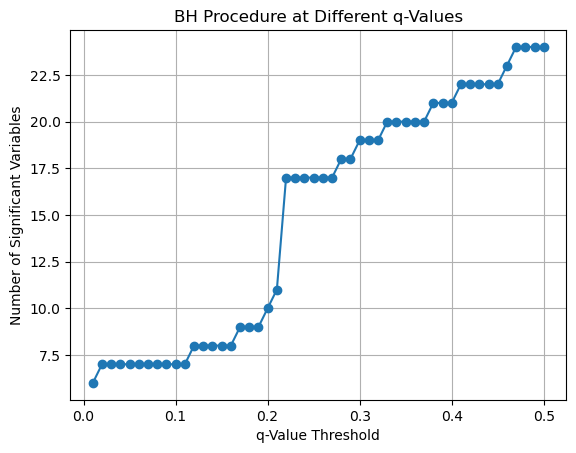

In [133]:
# List of q-values to test
q_values = np.linspace(0.01, 0.5, 50) 

significant_counts = []

for q in q_values:
    alpha_threshold, num_true_discoveries = fdr(p_values, q)
    significant_counts.append(num_true_discoveries)

# Plot the results
plt.plot(q_values, significant_counts, marker='o')
plt.xlabel("q-Value Threshold")
plt.ylabel("Number of Significant Variables")
plt.title("BH Procedure at Different q-Values")
plt.grid()
plt.show()

As we increase the q-value threshold, we will find more significant variables because we are being less strict in controlling the false discovery rate. On the other hand, as we decrease the q-value threshold, we will find fewer significant variables because we are more strict in controlling the false discovery rate. The choice of the q-value threshold is a trade-off between controlling FDR and identifying more significant variables. For this model, the significant variables changes across different q-values after the q-values goes beyond 0.2 as the plot shows above, that could indicate that the significant variables are not robust when q is over 0.2 and robust with q lower than 0.2


# 7a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two).

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [180]:
ESO = fund_df['Estimated Shares Outstanding'].reset_index(drop=True)
variables = fund_df.iloc[:, 0:25]

# Reset the index for consistent alignment with ESO
variables = variables.reset_index(drop=True)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
interaction_variables = poly.fit_transform(variables)
interaction_feature_names = poly.get_feature_names_out(variables.columns)

all_variables = pd.DataFrame(interaction_variables, columns=interaction_feature_names)
all_variables = sm.add_constant(all_variables)
model = sm.OLS(ESO, all_variables)
results_inter = model.fit()
print(results_inter.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  18:09:44   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
                                                                                      coef    std err         

# 7b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics. 

As all the financil metrics can be correlated with each other, the interaction terms can help identify those correlation especially when there is no clear linear relationship between these variables. Including the interaction terms could help deal with those complicated relationships and lead to a more accurate model. For example, the effect of cash flow on estimcated shares outstanding could be different in a growing industry compared to a mature and established industry. Also, changing in regulations, like tax laws could also influence profits, which impacting shares outstanding as well. And a company's ratio of debts to equity, their capital structure could also influence profits, assets, which could ultimately influence shares outstanding. In general, including interaction terms helps the model to be more powerful and accurate to predict the shares outstanding. 

# 8c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.

The model with Interaction has a much higer adjusted R Squared (92.6% compared to 84.6% for original model), which means approximately 92.6% of the variance in the estimated shares outstanding is explained by the model with interaction terms. This is a high value, suggesting a better fit to the data. F-statistics of 52.58 suggests that the model is statistically significant in general. Compared to the original model with 98.4 which is also significant. And the model with interaction also has lower AIC and BIC values which indicates better balance of model complexity and fit. 

# 8d. Discuss any significant changes in the model's performance or the coefficients of the predictors. 

Some interactions, like accounts payable + capital expenditures, capital surplus ^2,  Capital Surplus + Deferred Asset Charges, Common Stocks + Intangible Assets, etc are statistically significant at the 0.05 level

As a comparison with the original models, the model with interaction could lead to some variables more significant or less significant. For example, intangible assets has a p-value of 0.956 in the original model, but interaction terms being included, it has a more significant effect with a closed to zero p-value, and its interaction with common stock is also significant on shares outstanding. Also the Capital Expenditures has a p-value of 0.704 in the original model, but with interaction with accounts payable, they together has a more significant effect with a closed to zero p-value. There are many examples like this. Interaction terms reveals that the relationship between the variables and shares outstanding can be vary based on other variables. In general, interaction terms indeed improves the model's performance as discussed earliner (based on r^2, AIC, BIC, etc), but interpret the coefficients carefully is also necessary, considering the complexity and the possibility of overfitting it adds to the model. 

# 9a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model.

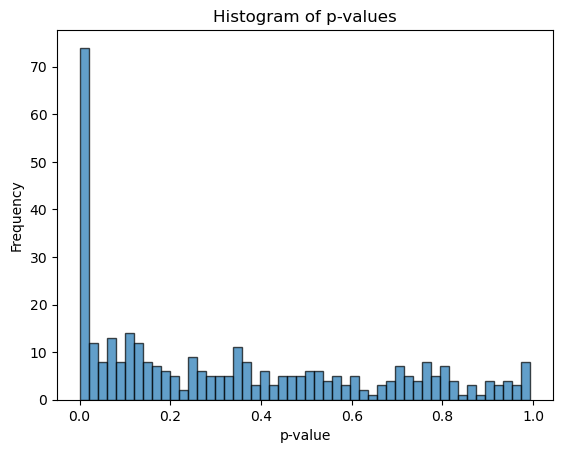

In [184]:
p_values_inter = results_inter.pvalues
# Plot the histogram of the p-values
plt.hist(p_values_inter, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show()

Unlike the original model which does not show a clear skewness, this model with interaction terms has the histogram of p-values heavily skewed towards lowere p-values(right skewed), indicating the interaction terms added a lot more significant power to the model, as adding the interaction terms leads the coefficients being more significant and provides a better fit. On the other hand, as discussed earlier, the original model had a peak on the large p-values, this seems to indicate there are variables which are irrelevant in the model. 

# 9b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects?

In [182]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Calculate the number of true discoveries
  num_true_discoveries = np.sum(sorted_pvals <= alpha)
  print(f"Estimated Number of True Discoveries: {num_true_discoveries}")
    
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha, num_true_discoveries

Alpha: 0.019637365694582368
Estimated Number of True Discoveries: 74


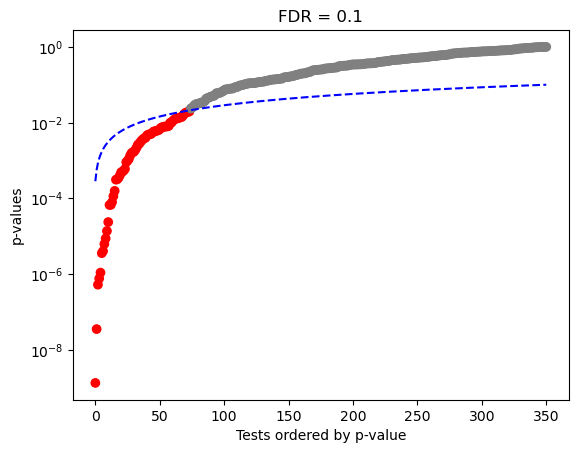

FDR threshold: (0.019637365694582368, 74)


In [185]:
alpha_threshold_inter = fdr(p_values_inter, 0.1, plotit=True)

# Output the FDR threshold
print("FDR threshold:", alpha_threshold_inter)

There are 74 estimated numbers of true discoveries now, including both main effects (first 25 variables as advised) and interaction effects.

# 9c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR. 

The model with interaction terms has a much higher number of true discoveries (74 vs 7), which means that the model with interaction terms are capturing more significant variables than the original model could capture, and including interaction terms helps to identify those significant relationships between the variables. However, it also means the false discoveries is increasing as well. Good thing is We use the same q= 0.1 on the original model and the model with interaction for the control of the FDR, which provides a fair comparison between the two models, which means that the increase of the true discoveries are not just due to the increased chances of false positive, but also due to significant effects.